# CLUSTERING

> Clustering techniques are used to group data/observations in a few segments so that data within any segment are similar while data across segments are different. Defining what we mean when we say “similar” or “different” observations is a key part of cluster analysis which often requires a lot of contextual knowledge and creativity beyond what statistical tools can provide.

Cluster analysis is used in a variety of applications. For example it can be used to identify consumer segments, or competitive sets of products, or groups of assets whose prices co-move, or for geo-demographic segmentation, etc. In general it is often necessary to split our data into segments and perform any subsequent analysis within each segment in order to develop (potentially more refined) segment-specific insights. This may be the case even if there are no intuitively “natural” segments in our data.

In [1]:
%matplotlib inline

In [2]:
# mall dataset
import pandas as pd

mall = pd.read_csv('Mall_Customers.csv')

In [3]:
mall


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:

# Rename the columns using the rename method
mall.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)


In [5]:
mall

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
#  'Gender' passed to get_dummies
encoded_data = pd.get_dummies(mall['Gender'])

# Concatenate the original DataFrame with the encoded DataFrame along the columns axis (axis=1)
mall = pd.concat([mall, encoded_data], axis=1)

# Drop the original 'Gender' column if you no longer need it
mall.drop(columns=['Gender'], inplace=True)

# Display the updated DataFrame
mall


,CustomerID,Age,Annual_Income,Spending_Score,Female,Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [7]:
# Define X
X = mall.drop('CustomerID', axis=1)
# remove the lables

In [8]:
X


,Age,Annual_Income,Spending_Score,Female,Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
195,35,120,79,True,False
196,45,126,28,True,False
197,32,126,74,False,True
198,32,137,18,False,True


In [9]:
%%time
# it takes some domain knowledge to know how many clusters to use. Default is 8.
# ask a beer expert how or what would you group beers by? 
# this is where the elbow method comes into play if you need to get started. 

# K-means with 2 clusters
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, n_init=1, random_state=1)
kmeans_2.fit(X) # training the model < -- learning
# no y becuase there is no prediction variable

CPU times: user 391 ms, sys: 143 ms, total: 534 ms
Wall time: 1.44 s


KMeans(n_clusters=2, n_init=1, random_state=1)

In [10]:
%%time

# K-means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3.fit(X)

CPU times: user 54.7 ms, sys: 53.6 ms, total: 108 ms
Wall time: 18.2 ms


KMeans(n_clusters=3, n_init=1, random_state=1)

In [11]:
%%time

# K-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=1, random_state=1)
kmeans_4.fit(X)

CPU times: user 88.1 ms, sys: 27.4 ms, total: 116 ms
Wall time: 19.2 ms


KMeans(n_clusters=4, n_init=1, random_state=1)

In [12]:
# Review the cluster labels (based on calories only, due to scale)
kmeans_3.labels_

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [13]:
mall['cluster'] = kmeans_3.labels_
mall.sort_values('cluster')
# look at what beers where placed in which clusters
# ignore the names. ignore the lables becuase that would not be there
# the model is looking at all the correlations of the features and putting them into clusters
# in real world, I would not have the name lables.

,CustomerID,Age,Annual_Income,Spending_Score,Female,Male,cluster
99,100,20,61,49,False,True,0
95,96,24,60,52,False,True,0
96,97,47,60,47,True,False,0
97,98,27,60,50,True,False,0
98,99,48,61,42,False,True,0
...,...,...,...,...,...,...,...
41,42,24,38,92,False,True,2
43,44,31,39,61,True,False,2
45,46,24,39,65,True,False,2
21,22,25,24,73,False,True,2


In [14]:
# Review the cluster centers
kmeans_3.cluster_centers_

array([[41.01481481, 58.60740741, 53.7037037 ,  0.57777778,  0.42222222],
       [40.02564103, 90.82051282, 22.28205128,  0.46153846,  0.53846154],
       [25.84615385, 25.30769231, 73.88461538,  0.61538462,  0.38461538]])

In [15]:
mall = mall.drop('CustomerID', axis=1)
centers = mall.groupby('cluster').mean()

In [16]:
centers

,Age,Annual_Income,Spending_Score,Female,Male
cluster,,,,,
0,41.014815,58.607407,53.703704,0.577778,0.422222
1,40.025641,90.820513,22.282051,0.461538,0.538462
2,25.846154,25.307692,73.884615,0.615385,0.384615


In [17]:
import numpy as np

# Create colors array for plotting
colors = np.array(['red', 'green', 'blue'])

Text(0, 0.5, 'annualincome')

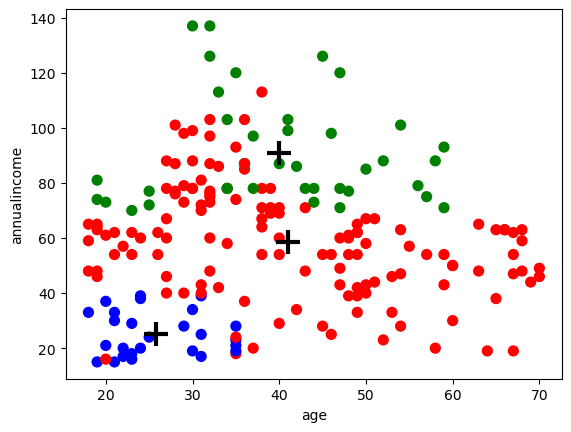

In [18]:
import matplotlib.pyplot as plt

# Plot clusters with their centers
plt.scatter(mall.Age, mall.Annual_Income, c=colors[mall.cluster], s=50)
plt.scatter(centers.Age, centers.Annual_Income, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('age')
plt.ylabel('annualincome')
# the + is a centroid and the dots are the clusters

In [ ]:
from pandas.plotting import scatter_matrix

# Scatter plot matrix
scatter_matrix(X, c=colors[mall.cluster], figsize=(10,10), s=100)

# a different way to visuzlize it

In [ ]:
# Do not forget to scale the data

In [20]:
from sklearn.preprocessing import StandardScaler

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

### USE SCALED DATA TO FIT 2, 3, 4 clusters

In [22]:
# K-means with 2 clusters on scaled data
kmeans_2s = KMeans(n_clusters=2, n_init=1, random_state=1)
kmeans_2s.fit(X_scaled)  # compute k-means clustering

KMeans(n_clusters=2, n_init=1, random_state=1)

In [23]:
# K-means with 3 clusters on scaled data
kmeans_3s = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3s.fit(X_scaled)

KMeans(n_clusters=3, n_init=1, random_state=1)

In [24]:
# K-means with 2 clusters on scaled data
kmeans_4s = KMeans(n_clusters=4, n_init=1, random_state=1)
kmeans_4s.fit(X_scaled)

KMeans(n_clusters=4, n_init=1, random_state=1)

In [25]:
mall['cluster'] = kmeans_3s.labels_
mall.sort_values('cluster')
# df_beer = beer.drop('name', axis=1)
mall.groupby('cluster').mean()

# look at the difference between this data and the previous

,Age,Annual_Income,Spending_Score,Female,Male
cluster,,,,,
0,38.098214,59.250000,51.526786,1.0,0.0
1,27.666667,64.933333,64.822222,0.0,1.0
2,52.511628,59.395349,31.441860,0.0,1.0


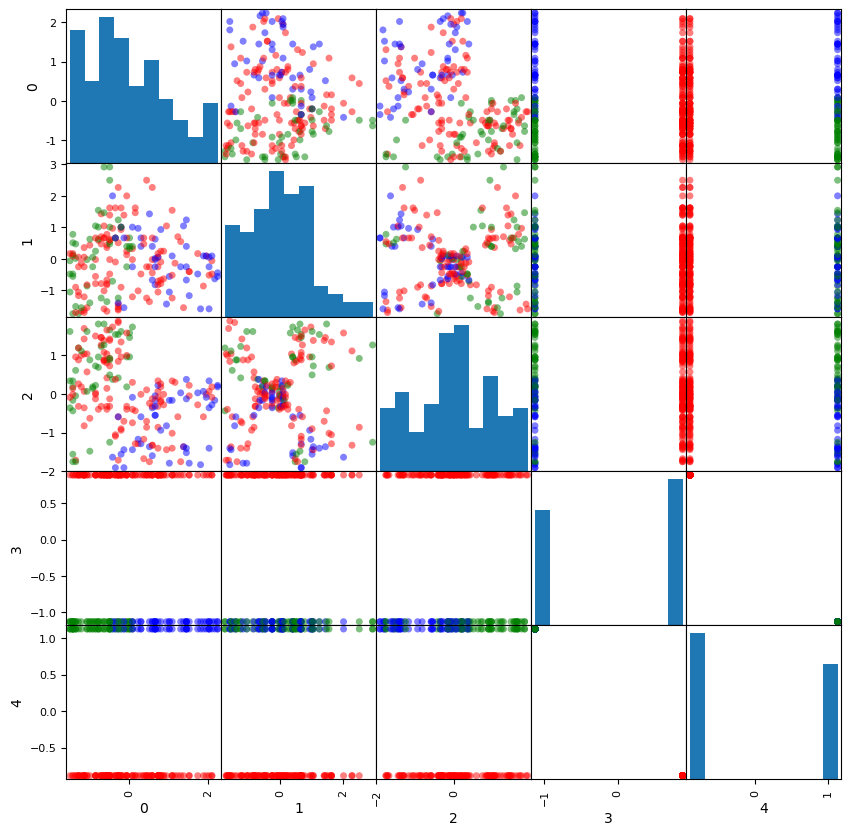

In [26]:
# Scatter plot matrix with scaled data
mall_scaled = pd.DataFrame(X_scaled)
scatter_matrix(mall_scaled, c=colors[mall.cluster], figsize=(10,10), s=100);

In [27]:
mall_scaled

,0,1,2,3,4
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


In [28]:
mall_scaled['cluster'] = kmeans_3s.labels_
mall_scaled.sort_values('cluster')
mall_scaled.groupby('cluster').mean()

,0,1,2,3,4
cluster,,,,,
0,-0.053953,-0.050002,0.051508,0.886405,-0.886405
1,-0.802591,0.166928,0.567657,-1.128152,1.128152
2,0.980450,-0.044454,-0.728220,-1.128152,1.128152


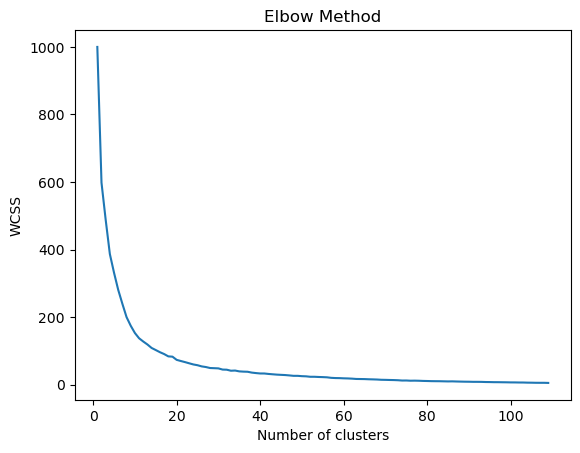

In [29]:
# Initialize empty list to store within-cluster sum of squares
wcss = []

# Calculate within-cluster sum of squares for different values of k
for i in range(1, 110):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 110), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## EVALUATING K-means

In addition to the performance comparisons we also wish to compare how good our clusters are. To do this we are first going to look at internal evaluation metrics. For internal evaluation we only use the input data and the clusters created and try to measure the quality of clusters created. We are going to use two metrics for this:

### INERTIA

Inertia is a metric that is used to estimate how close the data points in a cluster are. This is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster center. The intution behind inertia is that clusters with lower inertia are better as it means closely related points form a cluster. Inertia is calculated by scikit-learn by default.

In [30]:
print("Inertia for KMeans with 11 clusters = %lf " % kmeans_2s.inertia_)
print("Inertia for KMeans with 12 clusters =  %lf " % kmeans_3s.inertia_)
print("Inertia for KMeans with 13 clusters = %lf " % kmeans_4s.inertia_)

Inertia for KMeans with 11 clusters = 597.947294 
Inertia for KMeans with 12 clusters =  490.132278 
Inertia for KMeans with 13 clusters = 443.556328 


### SILHOUETTE SCORE

The silhouette score measures how close various clusters created are. A higher silhouette score is better as it means that we dont have too many overlapping clusters. The silhouette score can be computed using [sklearn.metrics.silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) from scikit learn.

This measure has a range of [-1, 1].

Silhoette Score (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The silhouette analysis is used to choose an optimal value for n_clusters. 


** Silhouette Score (SC) is calculated for each observation as follows:

- a = mean distance to all other points in its cluster
- b = mean distance to all other points in the next nearest cluster
- SC = (b-a)/max(a, b)

- SC ranges from -1 (worst) to 1 (best).

- A global SC is calculated by taking the mean of the SC for all observations.

In [31]:
mall.shape

(200, 6)

In [32]:
from sklearn import metrics

# NOTE: Use all 20 points to calculate the silhouette score. On a big dataset, you can adjust the sample_size
print("Silhouette Score for KMeans with 9 clusters = %lf" % metrics.silhouette_score(X_scaled, kmeans_2s.labels_, sample_size=20))
print("Silhouette Score for KMeans with 10 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_3s.labels_, sample_size=20))
print("Silhouette Score for KMeans with 11 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_4s.labels_, sample_size=20))

Silhouette Score for KMeans with 9 clusters = 0.370497
Silhouette Score for KMeans with 10 clusters = 0.448674 
Silhouette Score for KMeans with 11 clusters = 0.269507 


In [33]:
# 4 gives me the highest score

**Q**. How does increasing the number of clusters affect the silhouette score ?
>Increasing the number of clusters decreases the silhouette score since it is more likely that there are too many clusters, which are all similar

In [34]:
# Rerun the kmeans with scaled data

from sklearn.cluster import KMeans
scores = []
kmeans_2s = KMeans(n_clusters=12, n_init=1, random_state=1)
kmeans_2s.fit(X_scaled)
scores.append(metrics.silhouette_score(X_scaled, kmeans_2s.labels_, sample_size=20))
              
kmeans_3s = KMeans(n_clusters=13, n_init=1, random_state=1)
kmeans_3s.fit(X_scaled)
scores.append(metrics.silhouette_score(X_scaled, kmeans_3s.labels_, sample_size=20))
              
kmeans_4s = KMeans(n_clusters=14, n_init=1, random_state=1)
kmeans_4s.fit(X_scaled)
scores.append(metrics.silhouette_score(X_scaled, kmeans_4s.labels_, sample_size=20))
              
print ("Inertia for KMeans with 12 clusters = %lf " % kmeans_2s.inertia_)
print ("Inertia for KMeans with 13 clusters =  %lf " % kmeans_3s.inertia_)
print ("Inertia for KMeans with 14 clusters = %lf " % kmeans_4s.inertia_)

print ("Silhouette Score for KMeans with 12 clusters = %lf" % metrics.silhouette_score(X_scaled, kmeans_2s.labels_, sample_size=20))
print ("Silhouette Score for KMeans with 13 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_3s.labels_, sample_size=20))
print ("Silhouette Score for KMeans with 14 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_4s.labels_, sample_size=20))

Inertia for KMeans with 12 clusters = 126.109167 
Inertia for KMeans with 13 clusters =  117.671282 
Inertia for KMeans with 14 clusters = 113.397188 
Silhouette Score for KMeans with 12 clusters = 0.386197
Silhouette Score for KMeans with 13 clusters = 0.297063 
Silhouette Score for KMeans with 14 clusters = 0.326004 


*** Number of clusters increases to 4**

In [35]:
# optimal model is 4 clusters

In [36]:
# Calculate SC for K=2 through K=19
k_range = range(2, 20) # reminder: this is 2 thru 19. Start at 2 to separate into at least 2 clusters
silhouette_scores = []
inertia_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1, n_init=10)
    km.fit(X_scaled)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, km.labels_))
    inertia_scores.append(km.inertia_)

In [37]:
silhouette_scores
# want the highest
# notice how the score increases until 4 clusters and then begins to drop back down.
# 2, 3, 4 clusters and the 4th is looking the best

[0.39644160577705434,
 0.3656360567136071,
 0.33220710753566407,
 0.3465719086872586,
 0.362089924454678,
 0.38075477170175814,
 0.40144853311025186,
 0.4197946245398741,
 0.42085512755917237,
 0.4357484712532907,
 0.43485545035958834,
 0.430084238805309,
 0.4230595942836577,
 0.4370801589429665,
 0.4039901880046217,
 0.4115947173100078,
 0.420497743920297,
 0.41784899370793105]

In [38]:
inertia_scores
# want the lowest BUT need to trade off with silhouette_scores
# 16 is low becuase alomst every beer has its own group. 
# I want the highest silhouette with the lowest intertia that has to make sense for what we are working with. 
# inertia scorees: big drop off and low around 4, then the drop off stops being so steep. 


[597.9472937932279,
 490.13227755286044,
 386.8284255837667,
 336.1040749773297,
 280.6542886164908,
 239.10721742326564,
 199.7166255966767,
 174.18800022186804,
 158.7279020037207,
 138.35483946298865,
 126.10916689912446,
 117.67128179395806,
 108.21973971145792,
 101.35560571082316,
 95.161476908291,
 88.20980214269647,
 82.46384375539873,
 81.002497503814]

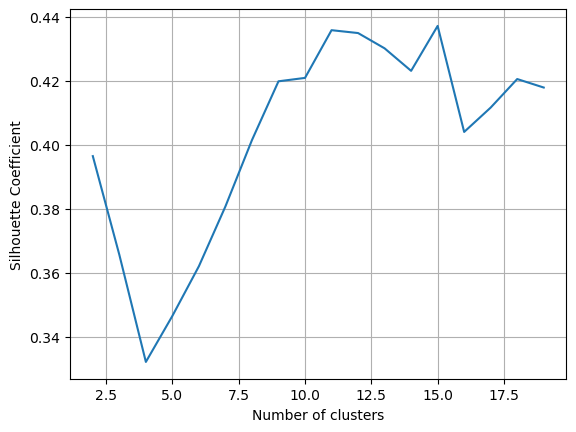

In [39]:
# Plot the results
plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
# inertia scorees: big drop off and low around 4 


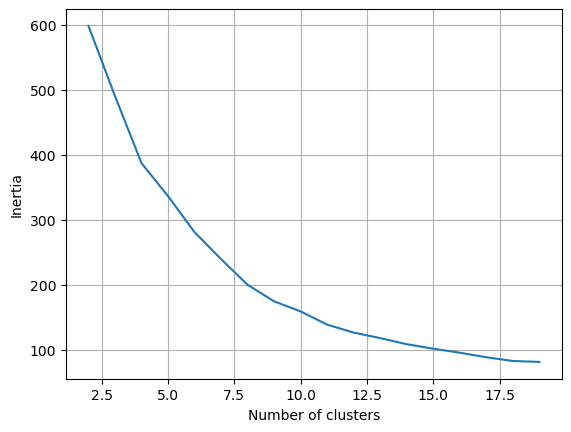

In [40]:
# Plot the results
plt.plot(k_range, inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [41]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1, n_init=10)
km.fit(X_scaled)
mall['cluster'] = km.labels_
mall.sort_values('cluster')
# look at clsuter 2, 
# in the futrue we could pull this out or limit clusters to 3 and have it folded into another cluster. 

,Age,Annual_Income,Spending_Score,Female,Male,cluster
121,38,67,40,True,False,0
36,42,34,17,True,False,0
38,36,37,26,True,False,0
40,65,38,35,True,False,0
136,44,73,7,True,False,0
...,...,...,...,...,...,...
47,27,40,47,True,False,3
167,33,86,95,True,False,3
45,24,39,65,True,False,3
58,27,46,51,True,False,3


In [42]:
# shows all rows
pd.set_option('display.max_rows', None)

# shows all cols

pd.set_option('display.max_columns', None)


In [43]:
# K-means with 10 clusters on scaled data
km7 = KMeans(n_clusters=10, random_state=1, n_init=10)
km7.fit(X_scaled)
mall['cluster'] = km7.labels_
mall.sort_values('cluster')

,Age,Annual_Income,Spending_Score,Female,Male,cluster
22,46,25,5,True,False,0
73,60,50,56,True,False,0
24,54,28,14,True,False,0
72,60,50,49,True,False,0
26,45,28,32,True,False,0
71,47,49,42,True,False,0
28,40,29,31,True,False,0
67,68,48,48,True,False,0
46,50,40,55,True,False,0
66,43,48,50,True,False,0


In [44]:
mall.groupby('cluster').mean()

,Age,Annual_Income,Spending_Score,Female,Male
cluster,,,,,
0,52.575758,47.484848,42.242424,1.0,0.0
1,24.608696,40.695652,61.478261,0.0,1.0
2,57.478261,55.347826,46.347826,0.0,1.0
3,32.545455,85.272727,80.590909,1.0,0.0
4,28.137931,50.827586,42.517241,1.0,0.0
5,33.277778,87.111111,82.666667,0.0,1.0
6,37.944444,86.388889,13.000000,0.0,1.0
7,44.600000,92.333333,21.600000,1.0,0.0
8,25.461538,25.692308,80.538462,1.0,0.0
